## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 59](#Problem-59)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).

## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 59 <a name="Problem-59"></a>

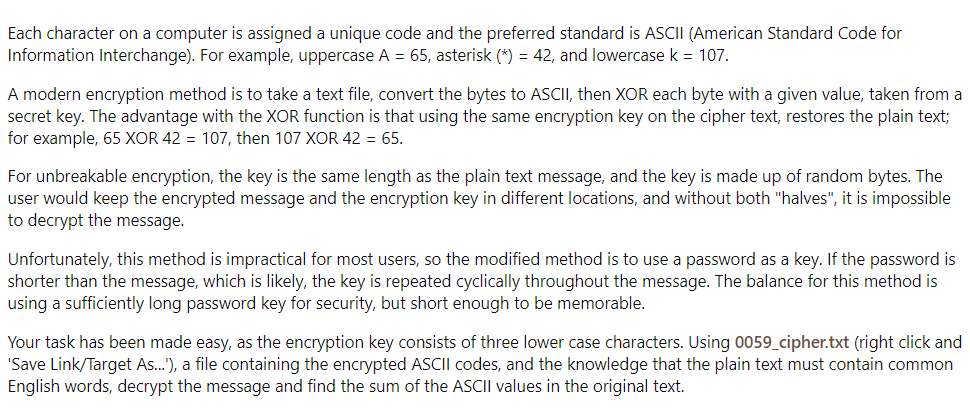

<br>
$**Hint**$

Follow these instructions:
1. Open and Read the file
2. Build common english letters AND space character.
3. Find 3 letters that have the most XOR scores with the file
4. Decrypt the message

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
from itertools import cycle

## Main Solution <a name="Main-Solution"></a>

First we open and read the files.

In [ ]:
with open("059_cipher.txt") as file:
    ciphers = list(map(int, file.read().split(',')))

We have to building our keys and common English letters AND space character.

In [ ]:
keys = set()
for i in range(ord("a"),ord("z") + 1):
    keys.add(i)

common = keys.copy()
common.add(ord(" ")) #space character has to play an important role in dycription

Then we define a function that tells us which letter has the most XOR scores with content of the file.

In [ ]:
def best(ciphers):
    max = 0
    for letter in keys:
        score = 0
        for code in ciphers:
            if letter ^ code in common:
                score += 1

        if score > max:
            max = score
            selected = letter
    return selected

Now all we have to do is to find 3 best letters and decrypt the message

In [ ]:
start_time = time.time()

passcode = [best(ciphers[::3]), best(ciphers[1::3]), best(ciphers[2::3])]
answer = 0
for i,j in zip(ciphers, cycle(passcode)):
    answer += i^j

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 129448 
Execution time: 0.0111 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

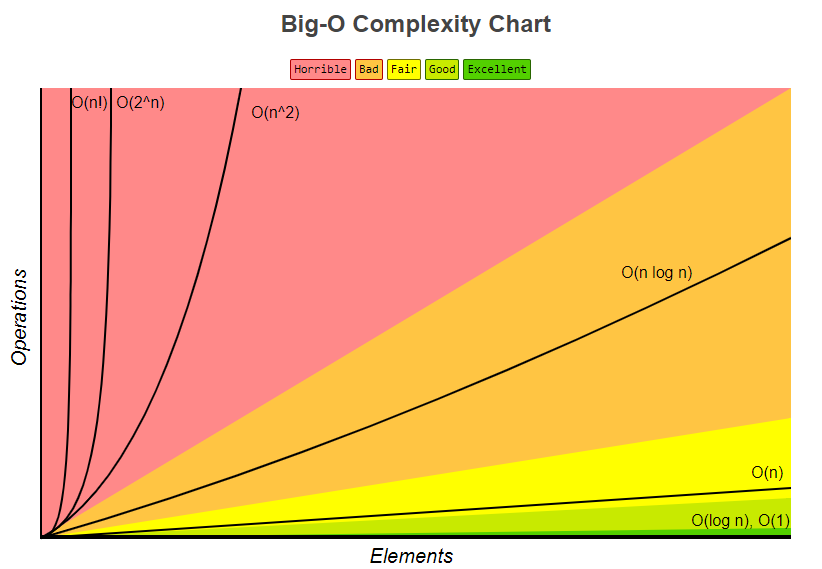

The time and space complexity of my code can be analyzed as follows:

1. Reading and Processing the Input:
   - Reading the cipher file and converting it into a list of integers has a time complexity of $O(n)$, where $n$ is the number of integers in the file.
   - Creating the `keys` set by iterating from `"a"` to `"z"` has a constant time complexity since the number of letters is fixed.
   - Copying the `keys` set to create the `common` set also has a constant time complexity.

2. `best(ciphers)` Function:
   - The function iterates over the `keys` set, which has a constant number of elements.
   - Nested within the loop, it iterates over the `ciphers` list, which has a length of $n$.
   - The overall time complexity of the function is $O(n)$, where $n$ is the length of the `ciphers` list.

3. Building the `passcode` List:
   - The list comprehension used to build the `passcode` list iterates over the `ciphers` list three times, with each iteration slicing the list with a step size of 3.
   - The time complexity of building the `passcode` list is $O(n/3)$, where $n$ is the length of the `ciphers` list. However, since the step size is a constant value of 3, we can simplify this to $O(n)$.

4. Calculating the `answer`:
   - The code uses the `zip()` function to iterate over pairs of elements from the `ciphers` list and the `passcode` list created by cycling through the `passcode` list.
   - The time complexity of this operation is $O(n)$, where $n$ is the length of the `ciphers` list.

In summary, the overall **time complexity** of the code is $O(n)$, where $n$ is the length of the `ciphers` list. The dominant factor is the iteration over the `ciphers` list in various parts of the code.

Regarding space complexity, the code uses additional data structures such as the `ciphers` list, the `keys` set, the `common` set, and the `passcode` list. The space complexity of these data structures depends on the number of elements they store, but they all have a constant number of elements. Therefore, the **space complexity** of the code is $O(1)$, indicating constant space usage.